# Logistic Regression Single Neuron

In this notebook, we briefly introduce the logistic regression single neuron model, then apply it on the CVDs dataset.

---

## Introduce

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. In regression analysis, logistic regression is estimating the parameters of a logistic model.

Logistic regression is used in various fields, including machine learning, most medical fields, and social sciences.

---

## Algorithm

Instead of creating a single neuron model for predicting a class deterministic label, we will next build a single neuron model that predicts a *class probability*.

### Sigmoid activation function

As before, we must first decide on an activation function before deciding on a cost/ loss function. For this purpose, we choose the *sigmoid* activation function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This differentiable function has a range in $(0, 1)$, so it would seem suitable for a possible function to turn the pre-activation value into a value representing a probability. Moreover, the sigmoid function (sometimes called the *logistic function*) has a smooth "S"-shape that is perfect for probabilities values transitioning, either growing or shrinking, as the input feature changes.

## Cross Entropy loss function

Suppose that we have two target values, 0 and 1. Now we are wishing to predict that *probability of each of these labels given a single feature measurement*. Thus, we encounter the conditional probability function:

$$
P\Big(y^{(i)}\mid x^{(i)}\Big)=\begin{cases}
          \hat{y}^{(i)}, \quad &  y^{(i)} = 1 \\
          1-\hat{y}^{(i)}, \quad & y^{(i)} = 0 \\
     \end{cases}
$$

Notice that this conditional probability depends on the value of $\hat{y}^{(i)}$, which in-turn depends on the values of our weight and bias. Moreover, we wish to *maximize* this probability over all training examples since this quantity is largest when our predicted probabilities are close approximations to the true 0-1 labels. Thus, we seek to solve the following maximization problem:

$$
\max_{\mathbf{w}, b} \sum_{i=1}^{N}P\Big(y^{(i)}\mid x^{(i)}\Big).
$$

Before considering this optimization problem, we next recall the famous Bernoulli formula for binary probabilities:
$$
P\Big(y^{(i)}\mid x^{(i)}\Big) = [\hat{y}^{(i)}]^{y}[1 - \hat{y}^{(i)}]^{(1-y)}
$$

Taking the logorithm on both sides of this equation yields (dropping the index notation to avoid messy equations):
$$
\begin{align} 
\log P\Big(y^{(i)}\mid x^{(i)}\Big)&= \log \hat{y}^{y}(1 - \hat{y})^{(1-y)}\\ 
&= y\log \hat{y} + (1-y) \log (1 - \hat{y})\\ 
\end{align}
$$

Since the logorithmic function is an *increasing function*, maximimizing $P\Big(y^{(i)}\mid x^{(i)}\Big)$ is equivalent to maximizing $\log P\Big(y^{(i)}\mid x^{(i)}\Big)$. Equivalently, we could also considering minimizing this function. Thus, we arrive at our single neuron coss/loss function for a single entry of data, which implies a full loss function. 

### Binary Cross Entropy Loss Function:
$$
L(\mathbf{w}, b) = -\frac{1}{N} \sum_{i=1}^{N} \log P\Big(y^{(i)}\mid x^{(i)}\Big) = \frac{1}{N}\sum_{i=1}^{N}\Big[ -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})\Big ]
$$

### Calculuting the Gradient of Binary Cross Entropy Loss Function
In order to optimize the logistic regression single neuron model with stochastic gradient descent, we first need understand how to calculate the gradient. As before, we will consider the cost function on a single instance of data:

$$
C(w_1, b; x^{(i)},y^{(i)}) = -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})
$$

When considering this equation it is important to remember that $\hat{y}^{(i)}$ really is a composite function. More specifically, we note

$$
\hat{y}^{(i)} = \sigma(z) = \sigma(w_1x^{(i)} + b).
$$

Next we note the particularly nice closed form of the derivative of the sigmoid function.

$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

With these two equations, we are now ready to compute the partial derivatives of $C(w_1, b; x_{1}^{(i)},y^{(i)})$ with respect to $w_1$ and $b$. Note that this cost function contains two pieces, namely $-y^{(i)}\log \hat{y}^{(i)}$ and $- (1-y^{(i)}) \log (1 - \hat{y}^{(i)})$. Since the derivative is a linear map, we may calculate $\partial C/ \partial w_1$ by calculating the the derivative of each piece of this equation and then add them together. 

$$
\begin{split}
\frac{\partial}{\partial w_1}[-y^{(i)}\log \hat{y}^{(i)}] & = \frac{\partial}{\partial w_1}[-y^{(i)}\log \sigma(w_1 x^{(i)}+b)] \\
 & = - \frac{y^{(i)}}{\sigma(w_1 x^{(i)}+b)}\frac{\partial}{\partial w_1} [\sigma(w_1 x^{(i)}+b)] \\
 & = - \frac{y^{(i)}}{\sigma(w_1 x^{(i)}+b)}\sigma(w_1 x^{(i)}+b)(1 - \sigma(w_1 x^{(i)}+b))\frac{\partial}{\partial w_1}[w_1 x^{(i)}+b] \\
 & = - y^{(i)}(1 - \sigma(w_1 x^{(i)}+b))x^{(i)} \\
 & = - y^{(i)}(1 - \hat{y}^{(i)})x^{(i)} 
\end{split}
$$

$$
\begin{split}
\frac{\partial}{\partial w_1}[-(1-y^{(i)}) \log (1 - \hat{y}^{(i)})] & = \frac{\partial}{\partial w_1}[-(1-y^{(i)})\log (1 - \sigma(w_1 x^{(i)}+b))] \\
 & = - \frac{(1 - y^{(i)})}{(1 - \sigma(w_1 x^{(i)}+b))}\frac{\partial}{\partial w_1} [1 - \sigma(w_1 x^{(i)}+b) ]\\
 & = -  \frac{(1 - y^{(i)})}{(1 - \sigma(w_1 x^{(i)}+b))} -\sigma(w_1 x^{(i)}+b)(1 - \sigma(w_1 x^{(i)}+b))\frac{\partial}{\partial w_1}[w_1 x^{(i)}+b] \\
 & = (1 - y^{(i)})\sigma(w_1 x^{(i)}+b))x^{(i)} \\
 & = (1 - y^{(i)})\hat{y}^{(i)}x^{(i)} 
\end{split}
$$

Now that we have calculated the derivative with respect to $w_1$ for each part of the binary cross entropy loss function, we next sum these derivatives:

$$
\begin{split}
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial w_1} & = - y^{(i)}(1 - \hat{y}^{(i)})x^{(i)} + (1 - y^{(i)})\hat{y}^{(i)}x^{(i)} \\
 & = [- y^{(i)}(1 - \hat{y}^{(i)}) + (1 - y^{(i)})\hat{y}^{(i)}]x^{(i)} \\
 & = [- y^{(i)} + y^{(i)}\hat{y}^{(i)} + \hat{y}^{(i)} - y^{(i)}\hat{y}^{(i)}]x^{(i)} \\
 & = (\hat{y}^{(i)} - y^{(i)}) x^{(i)}

\end{split}
$$

A similar calculation also yields the partial derivative of our cost function with respect to the bias $b$:

$$
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial b} = (\hat{y}^{(i)} - y^{(i)})
$$

---

## Coding

We will import the ```SingleNeuron``` Class from [Modules](https://github.com/YulinLi98/Sample_Repo/blob/main/Supervised_Learning/Modules) and define the sigmoid activation function and cross entropy loss function.

In [5]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set theme for plotting
sns.set_theme()

import sys 
sys.path.append('..')

# Import SingleNeuron Class
from Modules.single_neuron import SingleNeuron

# Define sigmoid activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Define MSE cost function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

We load the CVDs data set and preprocess the data.

In [6]:
# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

# Data Preprocessing by onehot encoding
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

# Standardize the data
df.Age = preprocessing.scale(df.Age)
df.RestingBP = preprocessing.scale(df.RestingBP)
df.MaxHR = preprocessing.scale(df.MaxHR)
df.Cholesterol = preprocessing.scale(df.Cholesterol)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.0,0,0,1,0,1,0,0,1


Then we extract the exploratory variables and response variable. We split the data into training set and testing set.

In [7]:
X = df.drop('HeartDisease',axis=1).to_numpy()
y = df.HeartDisease

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We instantiate an instance of logistic regression single neuron class with sigmoid function, cross entropy loss and SinleNeuron class. Then we fit the logit model on the training set.

In [8]:
# Instantiate one instance of logistic regression single neuron class
np.random.seed(2)
node = SingleNeuron(sigmoid, cross_entropy_loss)

# Call the train method to train the weights and bias of the given instance
node.train(X_train, y_train, alpha=0.01, epochs=50)

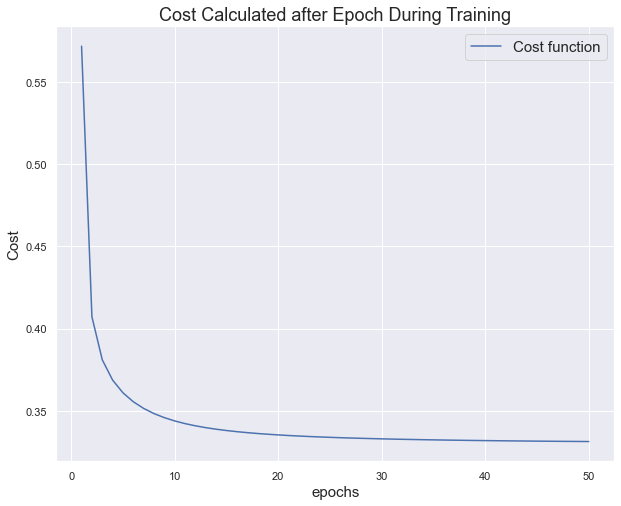

In [9]:
node.plot_cost_function()
plt.show()

The cross entropy cost is decreasing over each epoch, meaning that our logit model is learning. Now let's make prediction on the testing set and check the confusion matrix and classification report.

cf_matrix = [[100  12]
 [ 22 142]] 



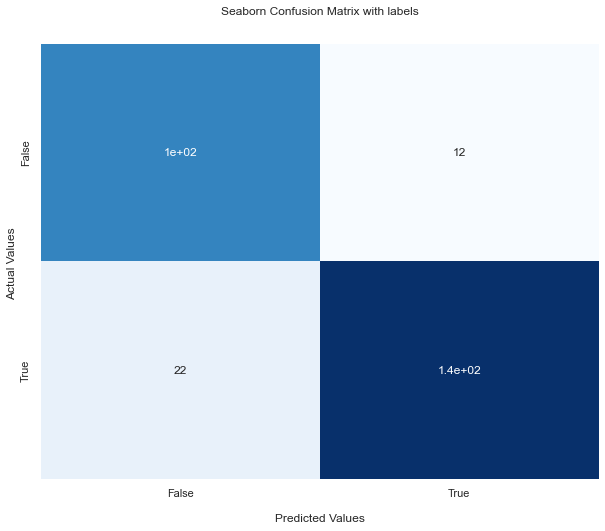

In [10]:
# Make predictions on testing data
y_pred = np.rint(node.predict(X_test))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [11]:
#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



The accuracy is 0.88, which is pretty high when compared with other classification models. Therefore, the logistic regression model performs well on our main data set. Now we will do an experiment by increasing the epoch number to 1_000.

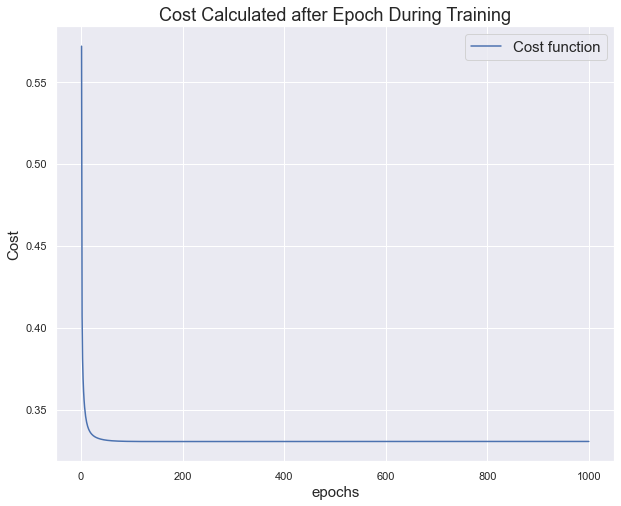

cf_matrix = [[101  11]
 [ 23 141]] 



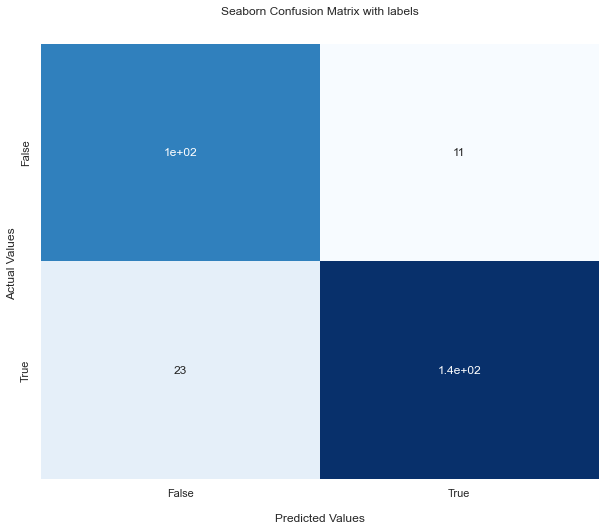

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       112
           1       0.93      0.86      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [12]:
# increase the epochs number to 1000
np.random.seed(2)
node2 = SingleNeuron(sigmoid, cross_entropy_loss)
node2.train(X_train, y_train, alpha=0.01, epochs=1000)

node2.plot_cost_function()
plt.show()

# Make predictions on testing data
y_pred = np.rint(node2.predict(X_test))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

Both the confusion matrix and classification report indicate that increasing the epoch number does not make significant improvement on the model performance. Now let's try performing logistic regression using scikit-learn.

cf_matrix = [[100  12]
 [ 22 142]] 



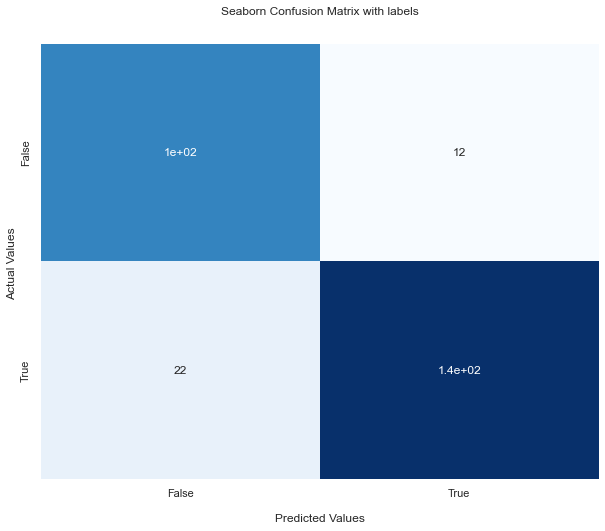

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#Check performance of our model with classification report
print(classification_report(y_test, y_pred))

The results from ```LogisticRegression``` are the same as our logit single neuron model.

---

## Conclusion

From the result above, we can see that the logistic regression single neuron model performs well on the CVDs data set. Compared with the single neuron perceptron model, the logistic regression model has better performance. The main reason is that the logistic regression model can deal with non-linearly separable data.